In [1]:
import optuna
import warnings 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer

import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, log_loss, confusion_matrix

sns.set_style('darkgrid')
%matplotlib inline

C:\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
train.head()
#test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
# Load the original dataset using pandas
org_data = pd.read_csv('cirrhosis.csv')
# See the shape of the original data
org_data.shape

(418, 20)

In [5]:
# Show the first 5 samples of train
org_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
# Show the first 5 samples of orginal data
org_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [7]:
# Drop the 'id' column 
train = train.drop(['id'],axis=1)
org_data = org_data.drop(['ID'],axis=1)



In [8]:
# Combine the competition train data and original data
train_data = pd.concat([train, org_data])

In [9]:
org_data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [10]:
train_data.isnull().sum()

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

In [11]:
## Exploratory Data Analysis (EDA)

In [12]:
# The shape of dataset

m, n = train_data.shape
print('Number of rows in dataset : ', m)
print('Number of columns in dataset : ', n)

Number of rows in dataset :  8323
Number of columns in dataset :  19


In [13]:
FEATURES = train_data.drop(['Status'], axis=1).columns
FEATURES

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [14]:
# Let’s get a quick summary of the dataset 
train_data.describe(include='all')

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
count,8323.000000,8217,8323.000000,8323,8217,8217,8217,8323,8323.000000,8189.000000,8323.000000,8215.000000,8217.000000,8217.000000,8187.000000,8312.000000,8321.000000,8317.000000,8323
unique,NaN,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Placebo,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,4164,NaN,7710,7813,4202,6188,7515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5197
mean,2024.528776,NaN,18381.192359,NaN,NaN,NaN,NaN,NaN,2.625940,351.219074,3.545767,84.421546,1823.044883,114.906530,115.662636,264.827238,10.634575,3.032103,NaN
std,1094.968696,NaN,3686.832308,NaN,NaN,NaN,NaN,NaN,3.847146,196.775246,0.350697,76.327480,1913.388685,49.134067,53.037660,88.039809,0.795707,0.867235,NaN
min,41.000000,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,NaN
25%,1220.000000,NaN,15574.000000,NaN,NaN,NaN,NaN,NaN,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,210.000000,10.000000,2.000000,NaN
50%,1831.000000,NaN,18713.000000,NaN,NaN,NaN,NaN,NaN,1.100000,299.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,264.000000,10.600000,3.000000,NaN
75%,2689.000000,NaN,20684.000000,NaN,NaN,NaN,NaN,NaN,3.000000,392.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000,NaN


In [15]:
# Let’s also see the columns and their data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8323 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8323 non-null   int64  
 1   Drug           8217 non-null   object 
 2   Age            8323 non-null   int64  
 3   Sex            8323 non-null   object 
 4   Ascites        8217 non-null   object 
 5   Hepatomegaly   8217 non-null   object 
 6   Spiders        8217 non-null   object 
 7   Edema          8323 non-null   object 
 8   Bilirubin      8323 non-null   float64
 9   Cholesterol    8189 non-null   float64
 10  Albumin        8323 non-null   float64
 11  Copper         8215 non-null   float64
 12  Alk_Phos       8217 non-null   float64
 13  SGOT           8217 non-null   float64
 14  Tryglicerides  8187 non-null   float64
 15  Platelets      8312 non-null   float64
 16  Prothrombin    8321 non-null   float64
 17  Stage          8317 non-null   float64
 18  Status   

In [16]:
# Number of Duplicated Rows 
train_data.duplicated().sum()

0

In [17]:
# Let's show the counts of observations in each categorical bin using bars

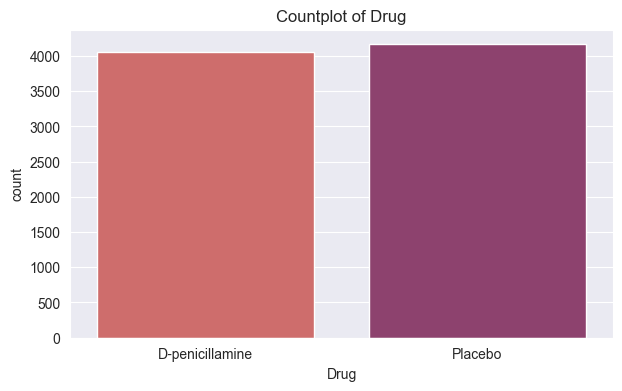

In [18]:
plt.figure(figsize=(7, 4))
sns.countplot(x ='Drug', data = train_data, palette = 'flare')
plt.title('Countplot of Drug')
plt.show()

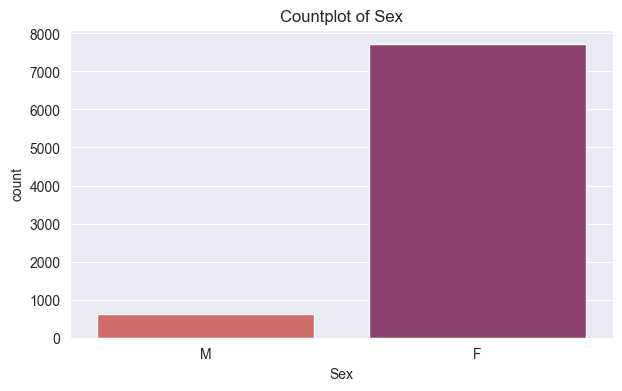

In [19]:
plt.figure(figsize=(7, 4))
sns.countplot(x ='Sex', data = train_data, palette = 'flare')
plt.title('Countplot of Sex')
plt.show()

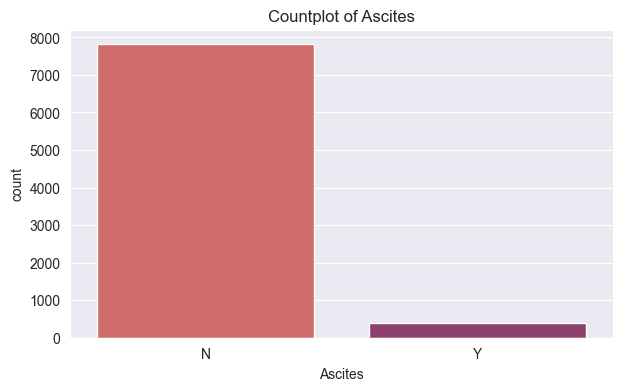

In [20]:
plt.figure(figsize=(7, 4))
sns.countplot(x ='Ascites', data = train_data, palette = 'flare')
plt.title('Countplot of Ascites')
plt.show()

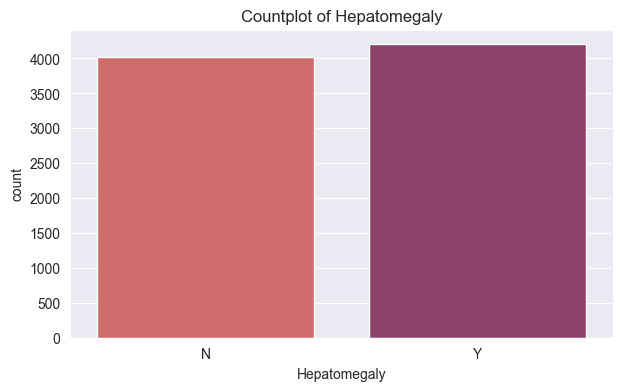

In [21]:
plt.figure(figsize=(7, 4))
sns.countplot(x ='Hepatomegaly', data = train_data, palette = 'flare')
plt.title('Countplot of Hepatomegaly')
plt.show()

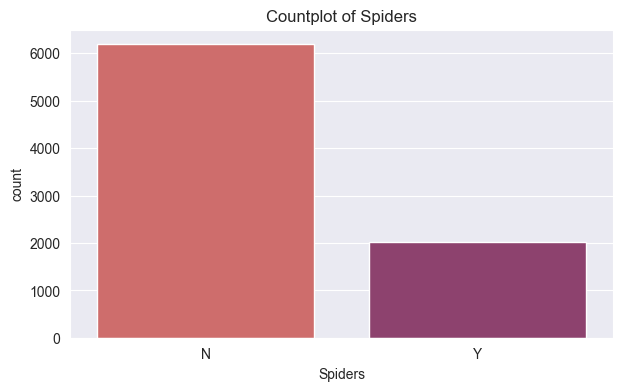

In [22]:
plt.figure(figsize=(7, 4))
sns.countplot(x ='Spiders', data = train_data, palette = 'flare')
plt.title('Countplot of Spiders')
plt.show()

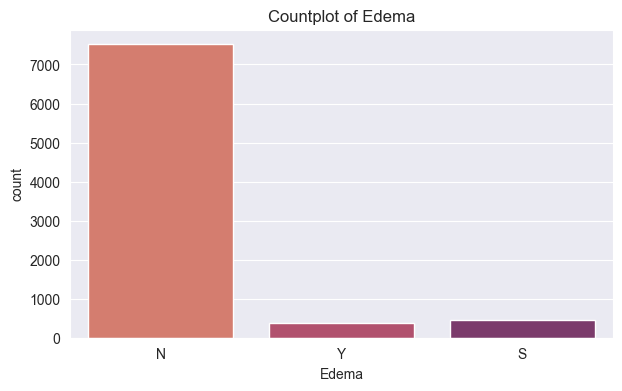

In [23]:
plt.figure(figsize=(7, 4))
sns.countplot(x ='Edema', data = train_data, palette = 'flare')
plt.title('Countplot of Edema')
plt.show()

In [24]:
# Let's show the distribution of other numerical features
# Note: Here the Age considered as the number of days.

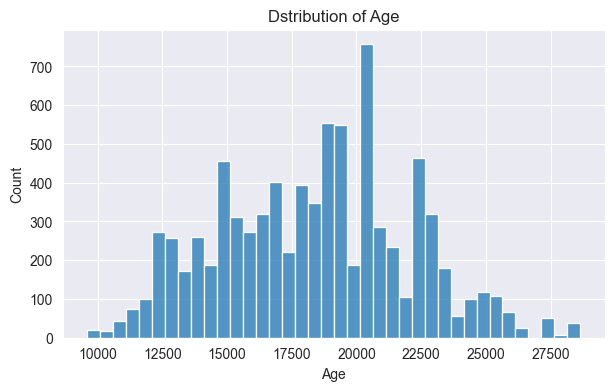

In [25]:
plt.figure(figsize=(7, 4))
sns.histplot(x ='Age', data = train_data)
plt.title('Dstribution of Age')
plt.show()

In [26]:
# Show the count of unique values in the 'Stage' column
train_data['Stage'].value_counts()

3.0    3308
4.0    2847
2.0    1744
1.0     418
Name: Stage, dtype: int64

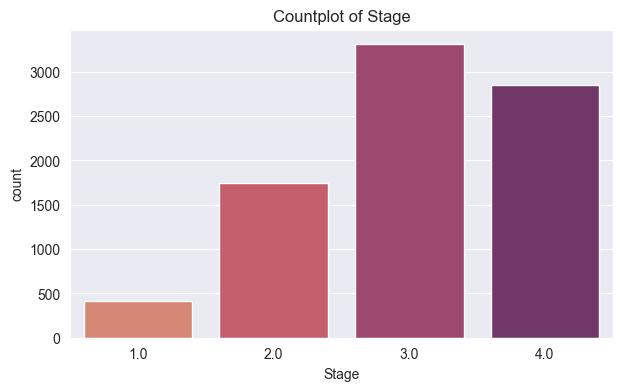

In [27]:
plt.figure(figsize=(7, 4))
sns.countplot(x ='Stage', data = train_data, palette = 'flare')
plt.title('Countplot of Stage')
plt.show()

In [28]:
# Target column

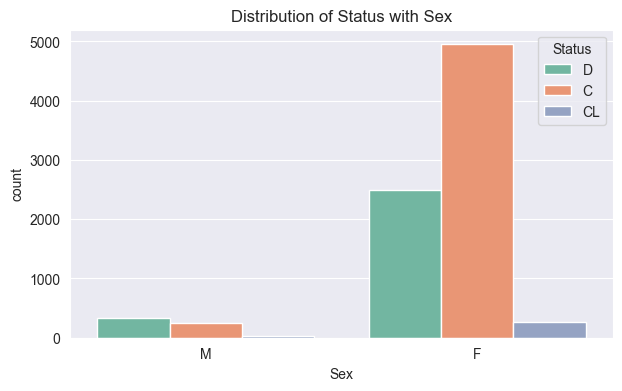

In [29]:
plt.figure(figsize=(7, 4))
sns.countplot(x ='Sex', data = train_data, hue='Status', palette = 'Set2')
plt.title('Distribution of Status with Sex')
plt.show()

In [30]:
# Show the count of unique values in the 'Status' column

Uniq_vals = train_data['Status'].value_counts()
Uniq_vals

C     5197
D     2826
CL     300
Name: Status, dtype: int64

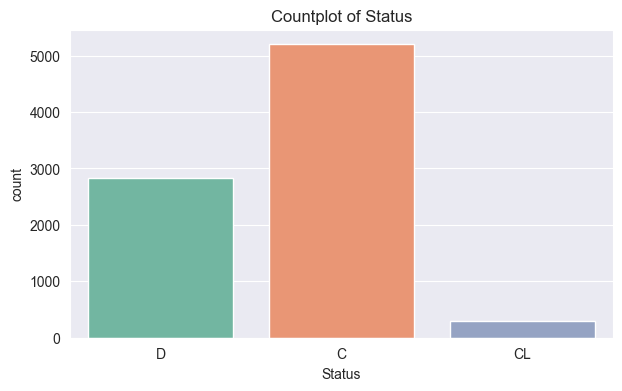

In [31]:
plt.figure(figsize=(7, 4))
sns.countplot(x ='Status', data = train_data, palette = 'Set2')
plt.title('Countplot of Status')
plt.show()

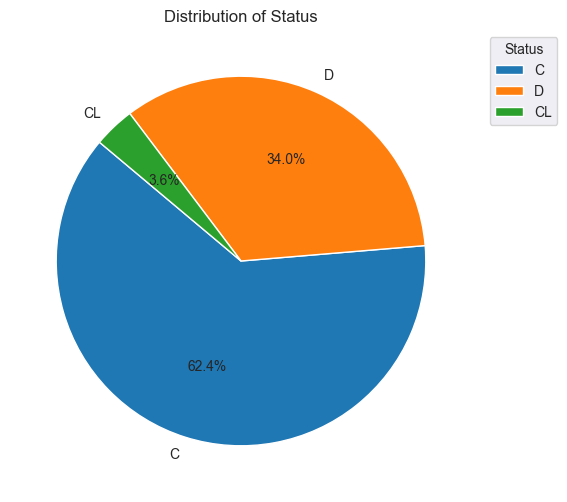

In [32]:
# Plotting the distribution of the target variable 'Status'

LABELS = Uniq_vals.index
y = Uniq_vals.values

# Creating autocpt arguments for pie chart
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%".format(pct)

# Creating the pie chart
plt.figure(figsize=(10, 6))
plt.pie(y, 
        labels = LABELS, 
        autopct = lambda pct: func(pct, Uniq_vals),
        startangle = 140)

plt.legend(loc ='upper right', 
           bbox_to_anchor=(1.2, 1), 
           title='Status')

plt.title('Distribution of Status')
plt.show()

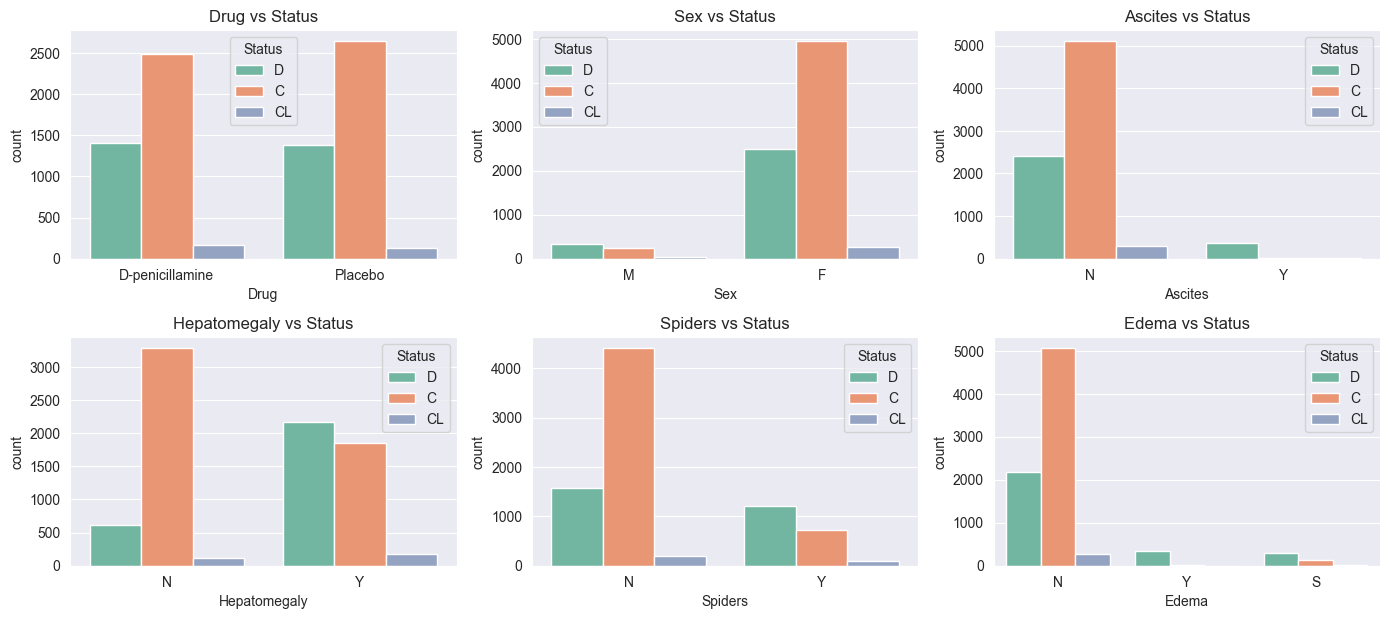

In [33]:
# Plot distribution of target column with categorical features
target = 'Status'
CAT_FEATS = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

plt.figure(figsize=(14, len(CAT_FEATS) * 2))
for i, col in enumerate(CAT_FEATS):
    plt.subplot(len(CAT_FEATS) // 2 + 1, 3, i + 1)
    sns.countplot(data=train_data, x=col, hue=target, palette = 'Set2')
    plt.title(f"{col} vs {target}")
    plt.tight_layout()

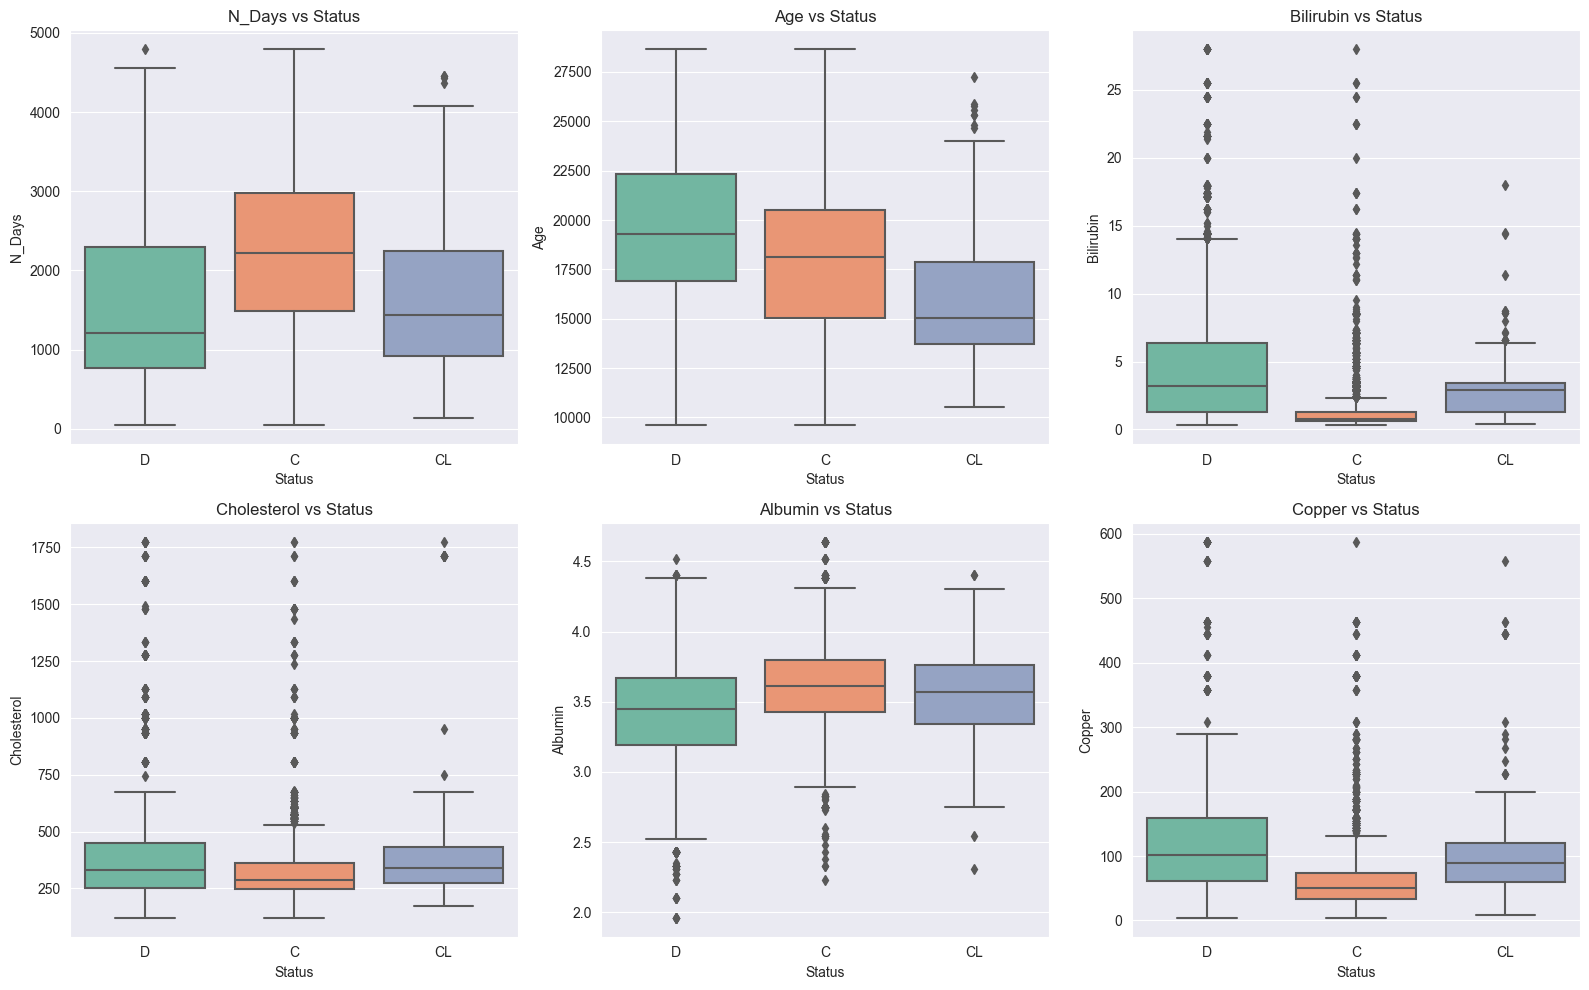

In [34]:
# Plot distribution of target column with numerical features
NUM_FEATS = [x for x in train_data.columns if x not in CAT_FEATS and x != target]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=target, y=NUM_FEATS[i], data=train_data, ax=ax, palette = 'Set2')
    ax.set_title(f"{NUM_FEATS[i]} vs {target}")
plt.tight_layout()
plt.show()

In [35]:
# Test Data

In [36]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [37]:
test.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [38]:
# Data Preprocessing & Data Cleaning

In [39]:
# Check for null values
train_data.isnull().sum()


N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

In [40]:
# Features with missing values we see from above

# miss_feat=['Drug',            # object
#            'Ascites',         # object
#            'Hepatomegaly',    # object
#            'Spiders',         # object
#            'Cholesterol',     # float64
#            'Copper',          # float64
#            'Alk_Phos',        # float64
#            'SGOT',            # float64
#            'Tryglicerides',   # float64
#            'Platelets',       # float64
#            'Prothrombin',     # float64
#            'Stage']           # float64

# len(miss_feat)

miss_cat_feat=['Drug',            # object
           'Ascites',         # object
           'Hepatomegaly',    # object
           'Spiders',         # object
           ]   
miss_num_feat=['Cholesterol',     # float64
               'Copper',          # float64
              'Alk_Phos',        # float64
              'SGOT',            # float64
              'Tryglicerides',   # float64
              'Platelets',       # float64
              'Prothrombin',     # float64
              'Stage']           # float64

print(len(miss_cat_feat))

print(len(miss_num_feat))



4
8


In [41]:
for feat in miss_num_feat:
    train_data[feat].fillna(train_data[feat].mean(),inplace=True)

In [42]:
for feat1 in miss_cat_feat:
    train_data[feat1].fillna(train_data[feat1].mode()[0], inplace = True)

In [43]:
train_data.isnull().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8323 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8323 non-null   int64  
 1   Drug           8323 non-null   object 
 2   Age            8323 non-null   int64  
 3   Sex            8323 non-null   object 
 4   Ascites        8323 non-null   object 
 5   Hepatomegaly   8323 non-null   object 
 6   Spiders        8323 non-null   object 
 7   Edema          8323 non-null   object 
 8   Bilirubin      8323 non-null   float64
 9   Cholesterol    8323 non-null   float64
 10  Albumin        8323 non-null   float64
 11  Copper         8323 non-null   float64
 12  Alk_Phos       8323 non-null   float64
 13  SGOT           8323 non-null   float64
 14  Tryglicerides  8323 non-null   float64
 15  Platelets      8323 non-null   float64
 16  Prothrombin    8323 non-null   float64
 17  Stage          8323 non-null   float64
 18  Status   

In [45]:
# Encoding
# Let's convert the categorical features into numerical in train data

encoder = LabelEncoder()
train_data['Drug'] = encoder.fit_transform(train_data['Drug'])
train_data['Sex'] = encoder.fit_transform(train_data['Sex'])
train_data['Ascites'] = encoder.fit_transform(train_data['Ascites'])
train_data['Hepatomegaly'] = encoder.fit_transform(train_data['Hepatomegaly'])
train_data['Spiders'] = encoder.fit_transform(train_data['Spiders'])
train_data['Edema'] = encoder.fit_transform(train_data['Edema'])
train_data['Status'] = encoder.fit_transform(train_data['Status'])

In [ ]:
# Data Splitting


In [46]:

# First split the features from target 
X = train_data.drop(['Status'], axis=1)
y = train_data['Status']

X.shape, y.shape

((8323, 18), (8323,))

In [47]:
RANDOM_SEED = np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=RANDOM_SEED
                                                    )

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (6658, 18)
X_test shape is  (1665, 18)
y_train shape is  (6658,)
y_test shape is  (1665,)


In [ ]:
# Modeling

In [ ]:
# Building a baseline model (XGBoost)

In [48]:
# Create the model
XGBModel = XGBClassifier()

# Fit the model
XGBModel.fit(X_train, y_train)

# Make predictions
preds = XGBModel.predict(X_test)

In [49]:
print(f'Predicted values: \n{preds[:10]}')
print(f'True values: \n{y_test[:10]}')

Predicted values: 
[0 2 0 0 0 0 2 0 0 0]
True values: 
7000    0
1346    2
3071    0
5204    0
4952    0
291     0
1728    2
4287    0
7423    0
4482    0
Name: Status, dtype: int32


In [50]:
y_pred_probs = XGBModel.predict_proba(X_test)
print('Log loss for xgb: ', log_loss(y_test, y_pred_probs))

Log loss for xgb:  0.5000363977528165


In [51]:
print("Accuracy:", accuracy_score(y_test, preds)) 
print("Precision:", precision_score(y_test, preds, average="weighted")) 
print('Recall:', recall_score(y_test, preds, average="weighted")) 

Accuracy: 0.8342342342342343
Precision: 0.8285978887417736
Recall: 0.8342342342342343


In [ ]:
# Building a baseline model (RandomForestClassifier)

In [52]:
# Create the model
RFModel = RandomForestClassifier()

# Fit the model
RFModel.fit(X_train, y_train)

# Make predictions
preds = RFModel.predict(X_test)

In [53]:
print(f'Predicted values: \n{preds[:10]}')
print(f'True values: \n{y_test[:10]}')

Predicted values: 
[0 2 0 0 0 0 2 0 0 0]
True values: 
7000    0
1346    2
3071    0
5204    0
4952    0
291     0
1728    2
4287    0
7423    0
4482    0
Name: Status, dtype: int32


In [54]:
y_pred_probs = RFModel.predict_proba(X_test)
print('Log loss for Random Forest: ', log_loss(y_test, y_pred_probs))

Log loss for Random Forest:  0.5495764610953109


In [55]:
print("Accuracy:", accuracy_score(y_test, preds)) 
print("Precision:", precision_score(y_test, preds, average="weighted")) 
print('Recall:', recall_score(y_test, preds, average="weighted")) 

Accuracy: 0.8348348348348348
Precision: 0.8300989074337711
Recall: 0.8348348348348348


In [56]:
# Building a baseline model (CatBoostClassifier)

In [57]:
# Create the model
CatModel = CatBoostClassifier()

# Fit the model
CatModel.fit(X_train, y_train, verbose=256)

# Make predictions
preds = CatModel.predict(X_test)

Learning rate set to 0.087159
0:	learn: 1.0146950	total: 143ms	remaining: 2m 22s
256:	learn: 0.3306299	total: 1.42s	remaining: 4.09s
512:	learn: 0.2515396	total: 2.67s	remaining: 2.54s
768:	learn: 0.2008499	total: 3.94s	remaining: 1.19s
999:	learn: 0.1662578	total: 5.08s	remaining: 0us


In [58]:
y_pred_probs = CatModel.predict_proba(X_test)
print('Log loss for Cat Boost: ', log_loss(y_test, y_pred_probs))

Log loss for Cat Boost:  0.45413478096009635


In [59]:
print("Accuracy:", accuracy_score(y_test, preds)) 
print("Precision:", precision_score(y_test, preds, average="weighted")) 
print('Recall:', recall_score(y_test, preds, average="weighted")) 

Accuracy: 0.8306306306306306
Precision: 0.8218160427582689
Recall: 0.8306306306306306


In [ ]:
# Hyperparameter tuning for XGBoost with Optuna

In [60]:
# Create an Optuna objective function
def objective(trial):
    # Here is the most hyperparameters we will focus on
    params = {
        "objective": "multi_logloss",
        "n_estimators": trial.suggest_int('n_estimators', 500, 750),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0), 
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0), 
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    # Build the xgboost model
    optuna_xgbmodel = XGBClassifier(**params,
                                    random_state=RANDOM_SEED)
    # Train the model 
    optuna_xgbmodel.fit(X_train, y_train)
    
    # Make the prediction probabilities to calculate the log loss
    y_pred_probs = optuna_xgbmodel.predict_proba(X_test)
    
    # Calculate the loss
    logloss = log_loss(y_test, y_pred_probs)
    
    return logloss

# Create the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2024-03-12 16:00:32,126] A new study created in memory with name: no-name-b21b0595-c7d2-4544-be32-dd4299b3caf9
[I 2024-03-12 16:00:35,982] Trial 0 finished with value: 0.42780679295891993 and parameters: {'n_estimators': 620, 'learning_rate': 0.014038251052527123, 'max_depth': 10, 'subsample': 0.7163847259088646, 'colsample_bytree': 0.5142531020087924, 'min_child_weight': 6}. Best is trial 0 with value: 0.42780679295891993.
[I 2024-03-12 16:00:40,541] Trial 1 finished with value: 0.7412718005911659 and parameters: {'n_estimators': 589, 'learning_rate': 0.001135981212195674, 'max_depth': 10, 'subsample': 0.903335237230079, 'colsample_bytree': 0.6528614125128614, 'min_child_weight': 8}. Best is trial 0 with value: 0.42780679295891993.
[I 2024-03-12 16:00:43,502] Trial 2 finished with value: 0.571244430303266 and parameters: {'n_estimators': 541, 'learning_rate': 0.0027018474772059027, 'max_depth': 7, 'subsample': 0.8698612050792152, 'colsample_bytree': 0.7950339733050621, 'min_child_w

[I 2024-03-12 16:01:25,088] Trial 26 finished with value: 0.44205550223787593 and parameters: {'n_estimators': 683, 'learning_rate': 0.008834900121684095, 'max_depth': 5, 'subsample': 0.5945314070954385, 'colsample_bytree': 0.4861696717839357, 'min_child_weight': 8}. Best is trial 12 with value: 0.42333267610368125.
[I 2024-03-12 16:01:27,269] Trial 27 finished with value: 0.4233144111718721 and parameters: {'n_estimators': 651, 'learning_rate': 0.022094685957642263, 'max_depth': 6, 'subsample': 0.7668126283842212, 'colsample_bytree': 0.36716974852065204, 'min_child_weight': 7}. Best is trial 27 with value: 0.4233144111718721.
[I 2024-03-12 16:01:29,708] Trial 28 finished with value: 0.42456942338157566 and parameters: {'n_estimators': 647, 'learning_rate': 0.022160756565431622, 'max_depth': 7, 'subsample': 0.621081010969187, 'colsample_bytree': 0.41211828854053995, 'min_child_weight': 12}. Best is trial 27 with value: 0.4233144111718721.
[I 2024-03-12 16:01:32,128] Trial 29 finished w

In [61]:
print('Best hyperparameters:', study.best_params)
print('Best Log Loss:', study.best_value)

Best hyperparameters: {'n_estimators': 651, 'learning_rate': 0.022094685957642263, 'max_depth': 6, 'subsample': 0.7668126283842212, 'colsample_bytree': 0.36716974852065204, 'min_child_weight': 7}
Best Log Loss: 0.4233144111718721


In [62]:

# Create the XGB model
XGBModel_2 = XGBClassifier(**study.best_params, random_state=RANDOM_SEED)

In [63]:
XGBModel_2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.36716974852065204, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.022094685957642263,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=651, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [64]:
preds = XGBModel_2.predict(X_test)

In [65]:
print(f'Predicted values: \n{preds[:10]}')
print(f'True values: \n{y_test[:10]}')

Predicted values: 
[2 2 0 0 0 0 2 0 0 0]
True values: 
7000    0
1346    2
3071    0
5204    0
4952    0
291     0
1728    2
4287    0
7423    0
4482    0
Name: Status, dtype: int32


In [66]:
# Calculate the log loss
y_pred_probs = XGBModel_2.predict_proba(X_test)
print('Log loss for tuned xgb: ', log_loss(y_test, y_pred_probs))

Log loss for tuned xgb:  0.4233144111718721


In [67]:
print("Accuracy:", accuracy_score(y_test, preds)) 
print("Precision:", precision_score(y_test, preds, average="weighted")) 
print('Recall:', recall_score(y_test, preds, average="weighted")) 

Accuracy: 0.8372372372372372
Precision: 0.8317829613288551
Recall: 0.8372372372372372


In [68]:
XGBModel_2.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.36716974852065204, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.022094685957642263,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=651, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [75]:

test = test.drop(['id'], axis=1)


In [84]:
test.shape

(5271, 18)

In [83]:
X.shape

(8323, 18)

In [85]:
# Now we will do the 
miss_cat_feat_test=['Drug',            # object
           'Ascites',         # object
           'Hepatomegaly',    # object
           'Spiders',         # object
           ]   
miss_num_feat_test=['Cholesterol',     # float64
               'Copper',          # float64
              'Alk_Phos',        # float64
              'SGOT',            # float64
              'Tryglicerides',   # float64
              'Platelets',       # float64
              'Prothrombin',     # float64
              'Stage']           # float64

print(len(miss_cat_feat))

print(len(miss_num_feat))

4
8


In [88]:
for feat in miss_num_feat_test:
    test[feat].fillna(train_data[feat].mean(),inplace=True)
    


In [89]:
for feat1 in miss_cat_feat_test:
    test[feat1].fillna(train_data[feat1].mode()[0], inplace = True)
    

In [92]:
# Encoding
# Let's convert the categorical features into numerical in test data

encoder = LabelEncoder()
test['Drug'] = encoder.fit_transform(test['Drug'])
test['Sex'] = encoder.fit_transform(test['Sex'])
test['Ascites'] = encoder.fit_transform(test['Ascites'])
test['Hepatomegaly'] = encoder.fit_transform(test['Hepatomegaly'])
test['Spiders'] = encoder.fit_transform(test['Spiders'])
test['Edema'] = encoder.fit_transform(test['Edema'])
# test['Status'] = encoder.fit_transform(test['Status'])    ### SINCE STATUS SHOULD BE PREDICTED THAT WHY WE HAVE REMOVED IT

In [93]:
preds = XGBModel_2.predict(test)

In [96]:
preds.

array([2, 0, 2, ..., 0, 0, 2], dtype=int64)

In [94]:
print(f'Predicted values: \n{preds[:10]}')
print(f'True values: \n{y_test[:10]}')  # Here we dont need to see the true values as it is test.csv file.... ok

Predicted values: 
[2 0 2 0 0 0 0 2 2 0]
True values: 
7000    0
1346    2
3071    0
5204    0
4952    0
291     0
1728    2
4287    0
7423    0
4482    0
Name: Status, dtype: int32


In [97]:
preds.shape # since its dimension and below dimension( of t_test) are different

(5271,)

In [98]:
y_test.shape 

(1665,)